[![Open In Colab]https://colab.research.google.com/github/ieee-saocarlos/2021EstudosPython/blob/main/1/allan/Lista_de_Compras.ipynb)


In [1]:
# baixa o dataset do github
!wget https://raw.githubusercontent.com/ieee-saocarlos/2021EstudosPython/main/1/compras.csv

--2021-07-03 22:52:00--  https://raw.githubusercontent.com/ieee-saocarlos/2021EstudosPython/main/1/compras.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 511973 (500K) [text/plain]
Saving to: ‘compras.csv’

compras.csv         100%[===================>] 499.97K  --.-KB/s    in 0.006s  

2021-07-03 22:52:00 (84.5 MB/s) - ‘compras.csv’ saved [511973/511973]



In [37]:
# importa as coisas e carrega o dataframe
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/compras.csv",
                 parse_dates = ["Date"])
df.head(10)

,Member_number,Date,itemDescription,quantidade,price
0,1808,2015-07-21,tropical fruit,3,40.99
1,2552,2015-05-01,whole milk,1,27.60
2,1187,2015-12-12,other vegetables,8,98.99
3,3037,2015-01-02,whole milk,5,5.10
4,4941,2015-02-14,rolls/buns,3,4.25
5,4501,2015-08-05,other vegetables,8,2.45
6,2762,2015-03-20,whole milk,3,37.45
7,4119,2015-12-02,tropical fruit,9,19.45
8,1340,2015-02-24,citrus fruit,1,27.25
9,1905,2015-07-07,other vegetables,1,86.10


In [32]:
# observa todos os possiveis valores da coluna de descrição de item
ingles = df.itemDescription.unique()
ingles

array(['tropical fruit', 'whole milk', 'other vegetables', 'rolls/buns',
       'citrus fruit', 'bottled water', 'yogurt', 'sausage',
       'root vegetables', 'pastry', 'soda'], dtype=object)

In [33]:
# palavras em porgutues
portugues = ["frutas tropicais", "laticinios", "vegetais",
             "pão", "frutas citricas", "garrafa de água",
             "iogurte", "salsicha", "tuberculos", "massas",
             "refrigerante"]

In [34]:
# criar dicionario de tradução
traduzir = {}

for eng, port in zip(ingles, portugues):
    traduzir[eng] = port

traduzir

{'bottled water': 'garrafa de água',
 'citrus fruit': 'frutas citricas',
 'other vegetables': 'vegetais',
 'pastry': 'massas',
 'rolls/buns': 'pão',
 'root vegetables': 'tuberculos',
 'sausage': 'salsicha',
 'soda': 'refrigerante',
 'tropical fruit': 'frutas tropicais',
 'whole milk': 'laticinios',
 'yogurt': 'iogurte'}

In [59]:
# criar função tradutora

def traduzir_func(linha):
    return traduzir[linha]

# aplica a função na coluna do dataframe e 
# cria uma nova coluna com as traduções

df["itemDescrição"] = df.itemDescription.apply(traduzir_func)
df.head(10)

,Member_number,Date,itemDescription,quantidade,price,preço,total,itemDescrição
0,1808,2015-07-21,tropical fruit,3,40.99,286.93,860.79,frutas tropicais
1,2552,2015-05-01,whole milk,1,27.60,193.20,193.20,laticinios
2,1187,2015-12-12,other vegetables,8,98.99,692.93,5543.44,vegetais
3,3037,2015-01-02,whole milk,5,5.10,35.70,178.50,laticinios
4,4941,2015-02-14,rolls/buns,3,4.25,29.75,89.25,pão
5,4501,2015-08-05,other vegetables,8,2.45,17.15,137.20,vegetais
6,2762,2015-03-20,whole milk,3,37.45,262.15,786.45,laticinios
7,4119,2015-12-02,tropical fruit,9,19.45,136.15,1225.35,frutas tropicais
8,1340,2015-02-24,citrus fruit,1,27.25,190.75,190.75,frutas citricas
9,1905,2015-07-07,other vegetables,1,86.10,602.70,602.70,vegetais


In [40]:
# criando função converter de um modo compacto
euros = 7

df["preço"] = df.price.apply(lambda linha: linha * euros)
df.head(10)

,Member_number,Date,itemDescription,quantidade,price,preço
0,1808,2015-07-21,tropical fruit,3,40.99,286.93
1,2552,2015-05-01,whole milk,1,27.60,193.20
2,1187,2015-12-12,other vegetables,8,98.99,692.93
3,3037,2015-01-02,whole milk,5,5.10,35.70
4,4941,2015-02-14,rolls/buns,3,4.25,29.75
5,4501,2015-08-05,other vegetables,8,2.45,17.15
6,2762,2015-03-20,whole milk,3,37.45,262.15
7,4119,2015-12-02,tropical fruit,9,19.45,136.15
8,1340,2015-02-24,citrus fruit,1,27.25,190.75
9,1905,2015-07-07,other vegetables,1,86.10,602.70


In [41]:
# criando função total de um modo compacto
df["total"] = df.preço * df.quantidade
df.head(10)

,Member_number,Date,itemDescription,quantidade,price,preço,total
0,1808,2015-07-21,tropical fruit,3,40.99,286.93,860.79
1,2552,2015-05-01,whole milk,1,27.60,193.20,193.20
2,1187,2015-12-12,other vegetables,8,98.99,692.93,5543.44
3,3037,2015-01-02,whole milk,5,5.10,35.70,178.50
4,4941,2015-02-14,rolls/buns,3,4.25,29.75,89.25
5,4501,2015-08-05,other vegetables,8,2.45,17.15,137.20
6,2762,2015-03-20,whole milk,3,37.45,262.15,786.45
7,4119,2015-12-02,tropical fruit,9,19.45,136.15,1225.35
8,1340,2015-02-24,citrus fruit,1,27.25,190.75,190.75
9,1905,2015-07-07,other vegetables,1,86.10,602.70,602.70


In [43]:
# ordenando pelo total
df.sort_values(by = "total", axis = 0, ascending = False)

,Member_number,Date,itemDescription,quantidade,price,preço,total
11435,4329,2014-01-20,bottled water,9,100.99,706.93,6362.37
9003,3621,2015-09-04,root vegetables,9,100.99,706.93,6362.37
7690,2394,2015-11-22,whole milk,9,100.99,706.93,6362.37
3475,1962,2015-05-04,sausage,9,100.75,705.25,6347.25
1091,1087,2015-03-19,sausage,9,100.75,705.25,6347.25
...,...,...,...,...,...,...,...
8243,1887,2015-09-11,yogurt,0,98.20,687.40,0.00
2166,3613,2015-05-06,whole milk,0,42.25,295.75,0.00
2170,1584,2015-01-26,rolls/buns,0,34.10,238.70,0.00
2175,2410,2015-11-21,bottled water,0,42.20,295.40,0.00


In [50]:
# qual a pessoal q mais gastou dinheiros?

df.groupby("Member_number"
    ).agg({"total": "sum"}
          ).sort_values(by = "total", axis = 0, ascending = False
                        ).head(10)

,total
Member_number,
3050,35617.19
3507,30219.35
2390,30026.78
3811,29895.88
2960,29307.39
3737,28902.65
2873,28260.33
2517,27829.90
2712,26644.17


In [55]:
# dinheiros por mes

df.groupby(df['Date'].dt.strftime('%B')
    ).agg({"total": "sum"}).sort_values(by = "total", ascending = False)

,total
Date,
August,2152493.91
January,2038402.80
July,1996398.74
November,1985992.05
May,1953429.52
October,1951982.13
March,1945470.17
June,1942281.04
April,1925825.65


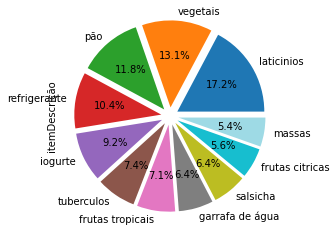

In [91]:
# distribuição de tipos de items comprados
_ = df.itemDescrição.value_counts(

).plot.pie(cmap = "tab20", autopct = "%.1f%%", explode = [0.1] * 11)

In [63]:
# ditribuiçaõ por mes de compra
df.groupby(df['Date'].dt.strftime('%B')).agg({"itemDescrição": "count"})

,itemDescrição
Date,
April,1217
August,1298
December,1130
February,1105
January,1256
July,1235
June,1212
March,1235
May,1232


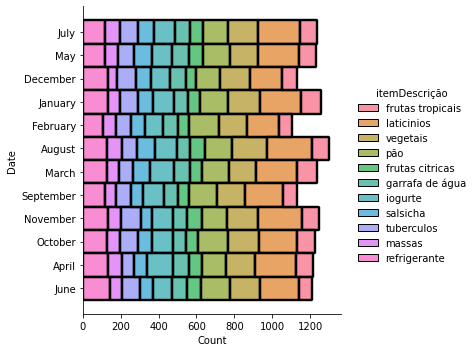

In [74]:
# os 2 juntos
_ = sns.displot(data = df, y = df['Date'].dt.strftime('%B'), 
                hue = "itemDescrição", multiple = "stack")